In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\menna\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: tf_keras
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip show keras

Name: keras
Version: 3.7.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: C:\Users\menna\anaconda3\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: scikeras, tensorflow_intel
Note: you may need to restart the kernel to use updated packages.


## Libraies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , cross_val_score , StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix , roc_auc_score
import xgboost as xgb


from keras.models import Sequential
from keras.layers import Dense , Input , Dropout
#from keras.wrappers.scikit_learn import KerasClassifier
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from keras import regularizers


## Reading the Data

In [2]:
df= pd.read_csv('creditcard.csv/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

In [5]:
print("Dataset Shape:", df.shape)
print("\nDataset types\n" , df.dtypes)

Dataset Shape: (284807, 31)

Dataset types
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [6]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

In [7]:
print("Dataset Statistical:")
df.describe()

Dataset Statistical:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


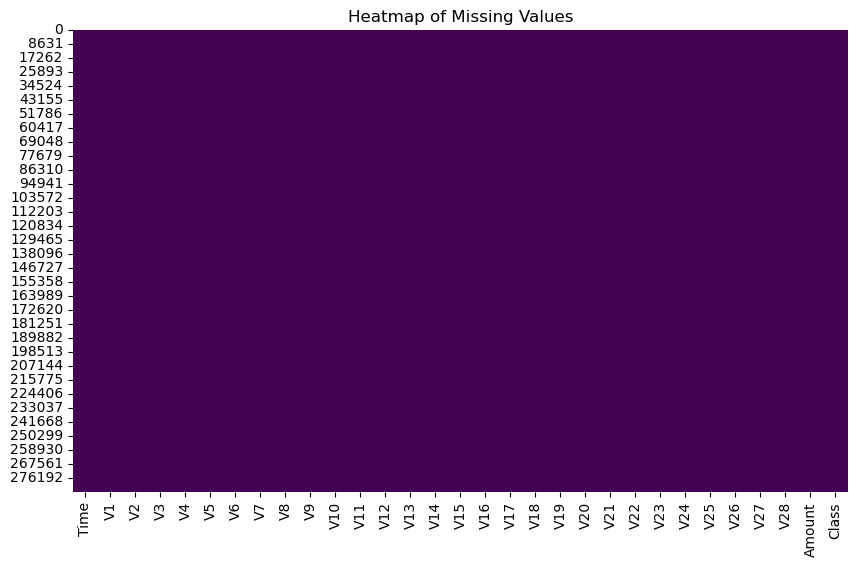

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

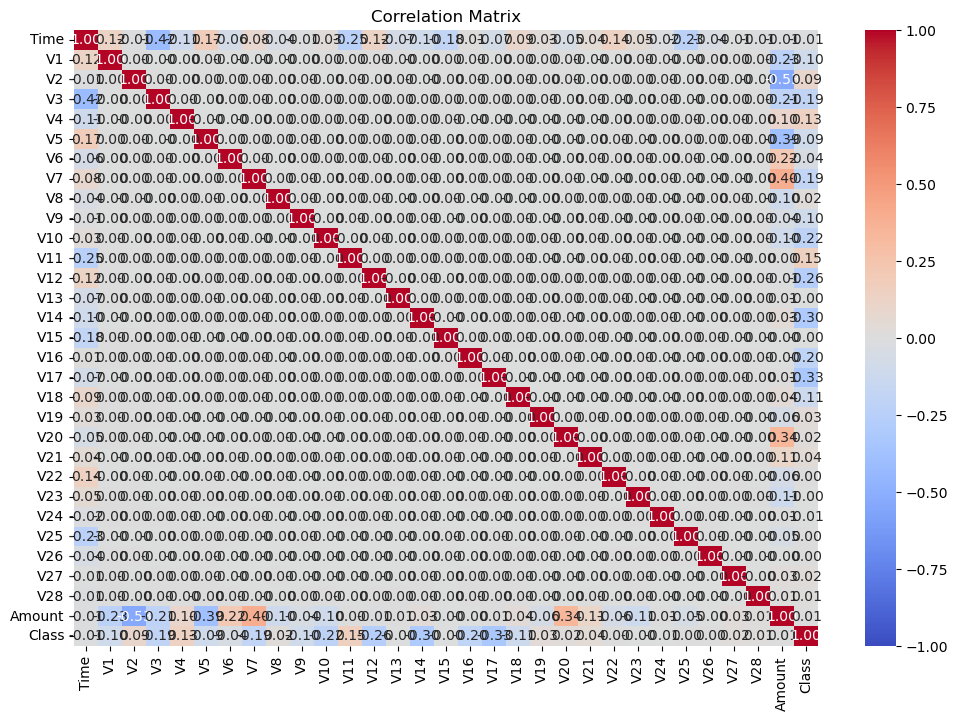

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

## Feature Engineering

In [11]:
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 1081


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
numerical_cols = df.select_dtypes(include=[np.number]).columns[:-1]

In [14]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nNumber of Outliers in {col}: {len(outliers)}")


Number of Outliers in Time: 0

Number of Outliers in V1: 6948

Number of Outliers in V2: 13390

Number of Outliers in V3: 3306

Number of Outliers in V4: 11094

Number of Outliers in V5: 12221

Number of Outliers in V6: 22886

Number of Outliers in V7: 8839

Number of Outliers in V8: 23904

Number of Outliers in V9: 8199

Number of Outliers in V10: 9345

Number of Outliers in V11: 735

Number of Outliers in V12: 15282

Number of Outliers in V13: 3362

Number of Outliers in V14: 14060

Number of Outliers in V15: 2884

Number of Outliers in V16: 8180

Number of Outliers in V17: 7353

Number of Outliers in V18: 7468

Number of Outliers in V19: 10150

Number of Outliers in V20: 27553

Number of Outliers in V21: 14401

Number of Outliers in V22: 1298

Number of Outliers in V23: 18467

Number of Outliers in V24: 4758

Number of Outliers in V25: 5333

Number of Outliers in V26: 5665

Number of Outliers in V27: 38799

Number of Outliers in V28: 30094

Number of Outliers in Amount: 31685


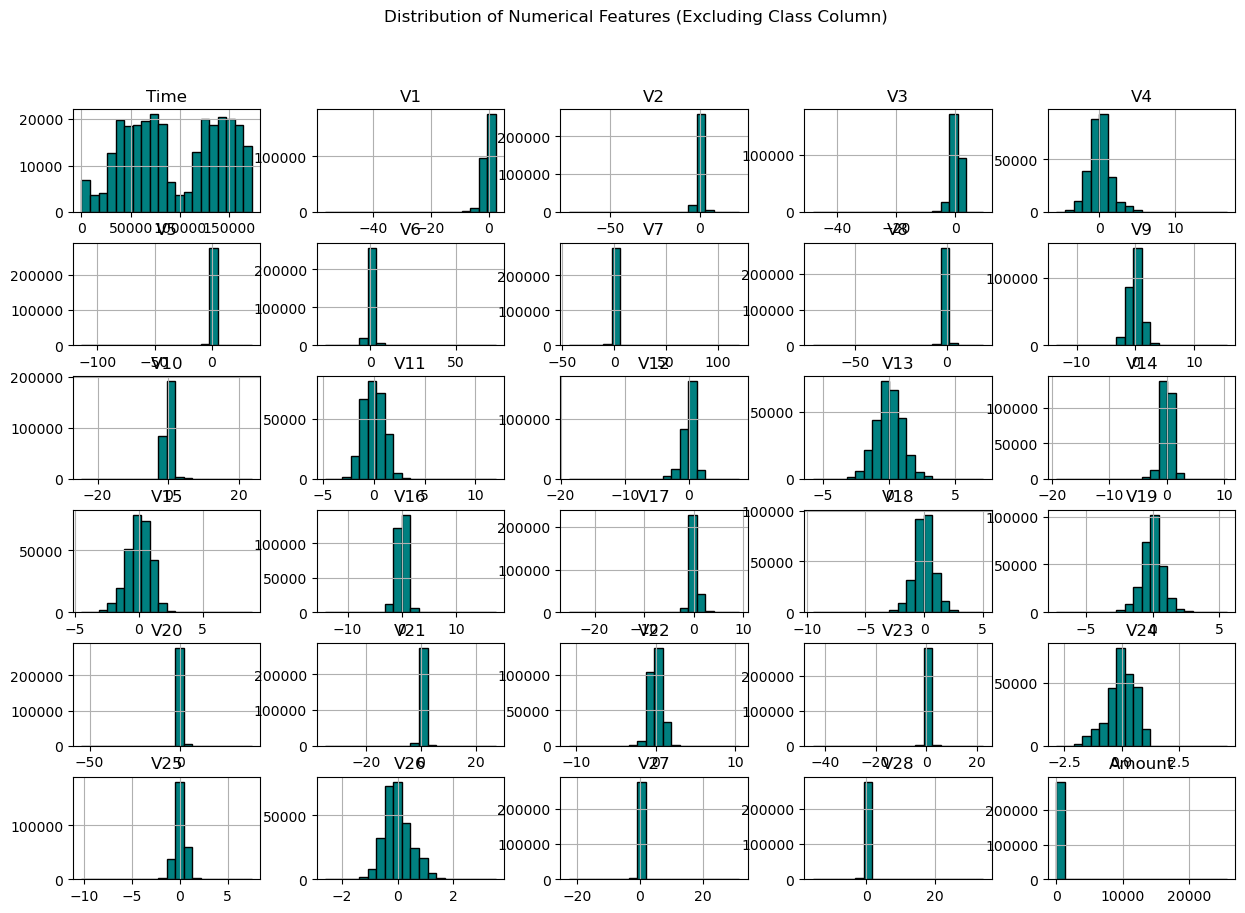

In [15]:
numerical_cols = df.select_dtypes(include=[np.number]).columns[:-1]  # Exclude last column
df[numerical_cols].hist(figsize=(15, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle("Distribution of Numerical Features (Excluding Class Column)")
plt.show()

In [16]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

for col in numerical_cols:
    df[col] = zscore(df[col])

In [17]:
df[numerical_cols].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,...,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05
mean,1.218105e-16,1.722977e-17,1.202077e-17,1.314271e-16,-2.364085e-17,-1.923323e-17,1.843185e-17,-4.087062e-17,-1.342319e-17,-1.636578e-17,...,-2.404154e-18,-3.806577e-18,1.602769e-18,-8.815232e-18,-3.205539e-18,5.449416e-17,1.552683e-17,-6.711597e-18,-5.249070e-17,2.997179e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.996823e+00,-2.731585e+00,-2.454687e+00,-2.770335e+00,-2.447415e+00,-2.454912e+00,-2.421464e+00,-2.600433e+00,-2.227692e+00,-2.443734e+00,...,-2.206203e+00,-2.579825e+00,-3.041240e+00,-2.328341e+00,-2.605080e+00,-2.684188e+00,-2.510228e+00,-1.978950e+00,-2.101799e+00,-8.381522e-01
25%,-8.552128e-01,-6.262271e-01,-5.780261e-01,-6.702416e-01,-6.259145e-01,-6.396726e-01,-6.757877e-01,-6.506016e-01,-5.711040e-01,-6.164303e-01,...,-5.779757e-01,-6.587818e-01,-7.697857e-01,-5.889727e-01,-6.003911e-01,-6.511468e-01,-6.906263e-01,-5.070258e-01,-5.167466e-01,-7.477039e-01
50%,-2.131081e-01,-3.742670e-02,1.534144e-02,1.111090e-01,6.455829e-03,-4.821997e-02,-1.827882e-01,3.624123e-02,-9.440238e-02,-3.529776e-02,...,-1.083671e-01,-4.434143e-02,7.023183e-03,-2.485043e-02,6.510092e-02,2.589929e-02,-1.031766e-01,-6.976907e-02,-1.472289e-05,-4.828196e-01
75%,9.369423e-01,7.773445e-01,6.730811e-01,7.298208e-01,5.884194e-01,5.704867e-01,4.879964e-01,6.492862e-01,5.332877e-01,6.017722e-01,...,5.075093e-01,6.219136e-01,7.445171e-01,5.706065e-01,7.360680e-01,7.042138e-01,5.224415e-01,4.742572e-01,5.399547e-01,4.137494e-01
max,1.642362e+00,1.493501e+00,2.549742e+00,2.829914e+00,2.409920e+00,2.385726e+00,2.233672e+00,2.599118e+00,2.189875e+00,2.429076e+00,...,2.135737e+00,2.542957e+00,3.015971e+00,2.309975e+00,2.740757e+00,2.737255e+00,2.342043e+00,1.946182e+00,2.125007e+00,2.155929e+00


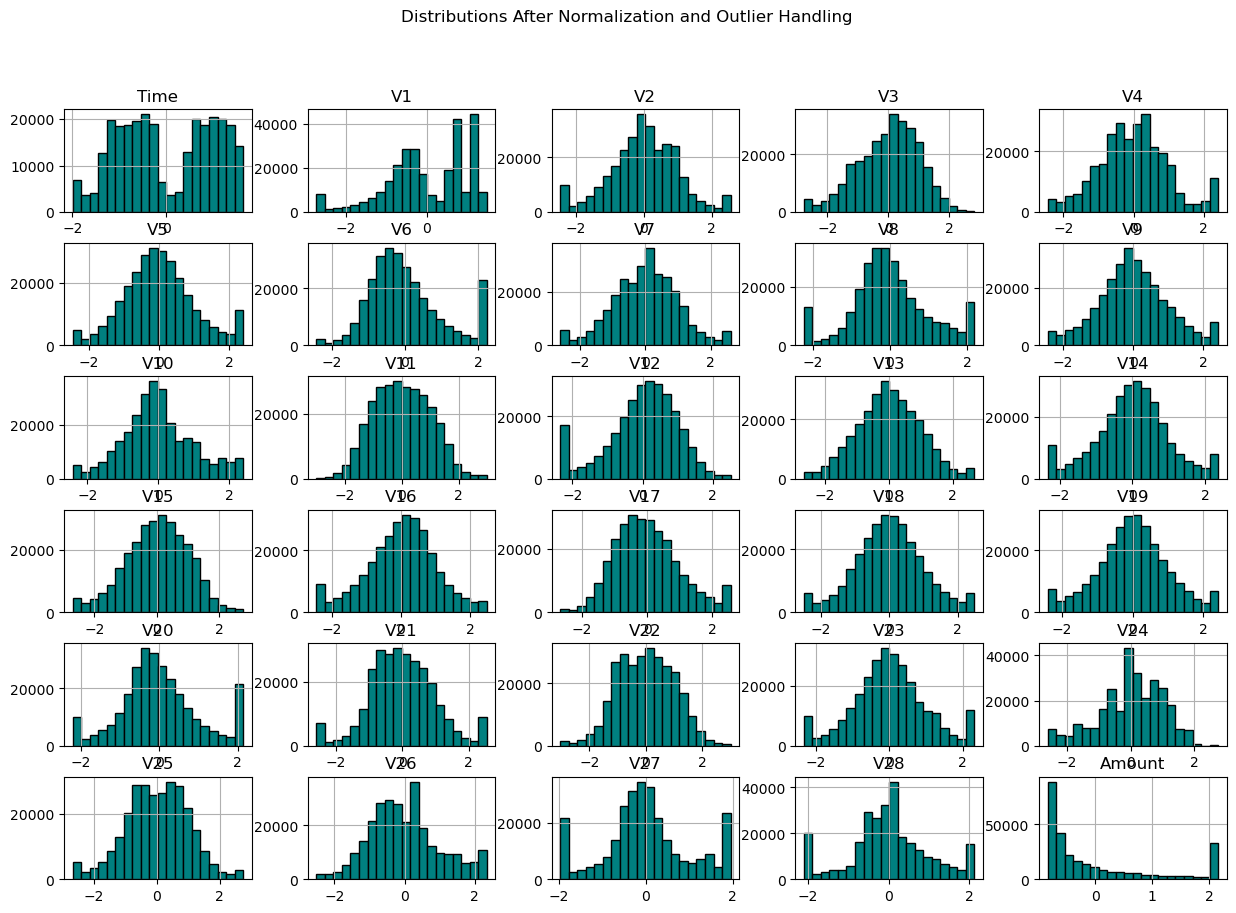

In [18]:
df[numerical_cols].hist(figsize=(15, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle("Distributions After Normalization and Outlier Handling")
plt.show()

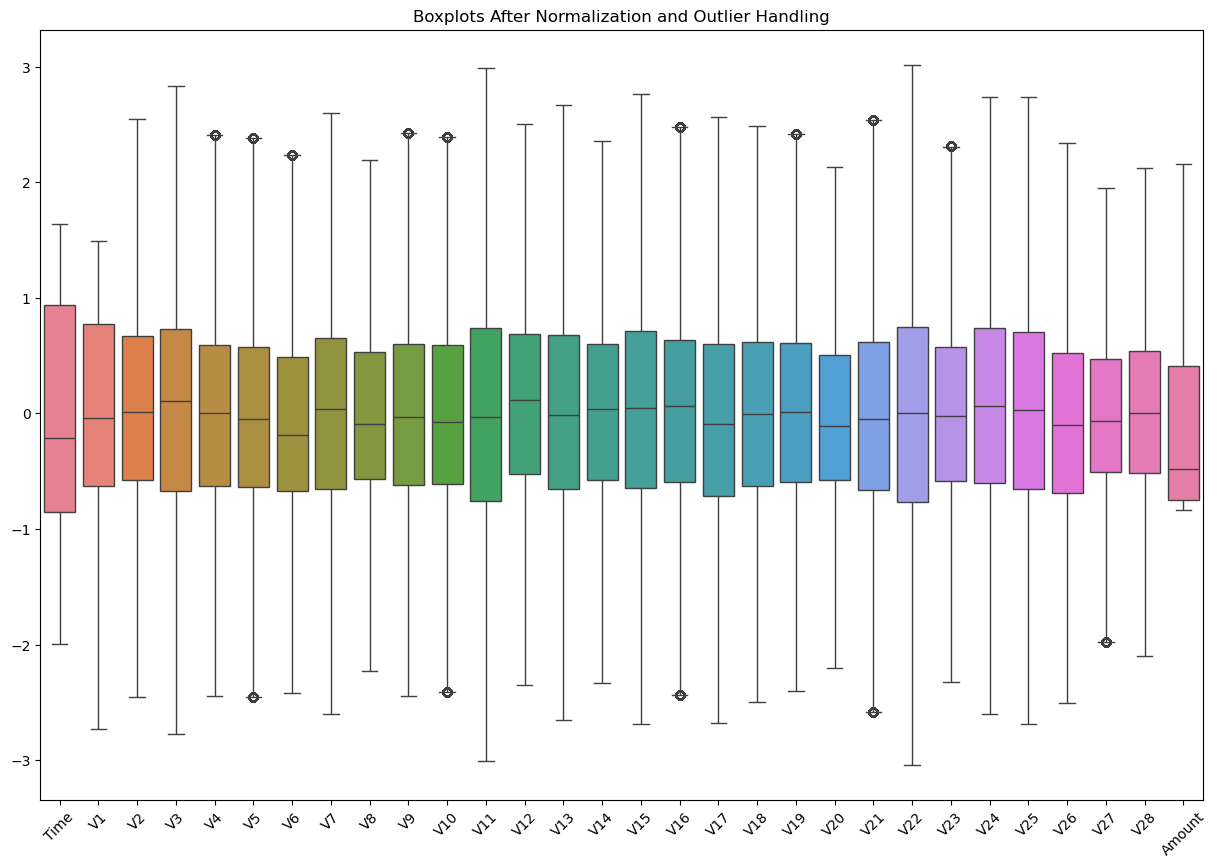

In [28]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplots After Normalization and Outlier Handling")
plt.xticks(rotation=45)
plt.show()

In [19]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    283253
1       473
Name: count, dtype: int64


In [20]:
class_percentage = df['Class'].value_counts(normalize=True) * 100
print(class_percentage)

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


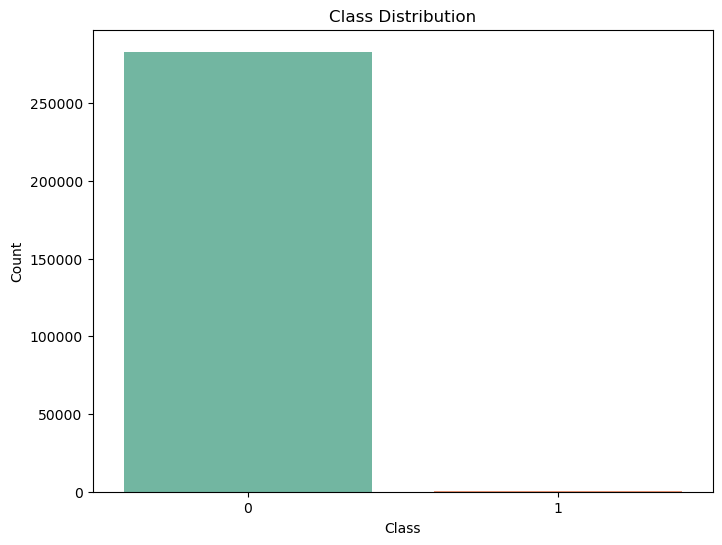

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class', hue='Class', palette='Set2', legend=False)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [3]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Class distribution before SMOTE:\n{y_train.value_counts()}")
print(f"Class distribution after SMOTE:\n{y_train_resampled.value_counts()}")


Class distribution before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64
Class distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


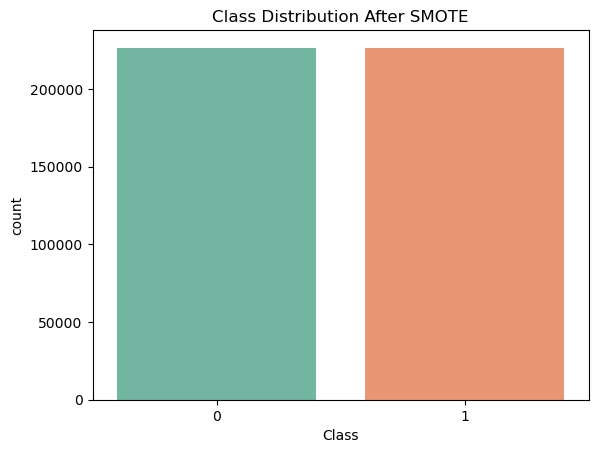

In [23]:
sns.countplot(x=y_train_resampled, hue=y_train_resampled, palette='Set2', legend=False)
plt.title('Class Distribution After SMOTE')
plt.show()


## Models Phase 

In [24]:
def create_nn():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

nn_model = KerasClassifier(build_fn=create_nn, epochs=10, batch_size=32, verbose=0)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    'Neural Network': nn_model
}

In [36]:
# print(X_train_resampled.shape[1])

In [25]:
evaluation_results = {}
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  
    trained_models[name] = model

    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)  
    if hasattr(model, "predict_proba"):  
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = None

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"


    # Save metrics to the dictionary
    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1 Score": report["weighted avg"]["f1-score"],
        "classification_report" :report ,
        "Confusion Matrix": cm.tolist(),
        "ROC-AUC": roc_auc,
        
    }

Training Logistic Regression...
Evaluating Logistic Regression...
Training Decision Tree...
Evaluating Decision Tree...
Training SVM...
Evaluating SVM...
Training Random Forest...
Evaluating Random Forest...
Training Gradient Boosting...
Evaluating Gradient Boosting...
Training XGBoost...
Evaluating XGBoost...
Training Neural Network...


c:\Users\menna\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\menna\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Evaluating Neural Network...


In [29]:
print("\nModel Evaluation Results:\n")
for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    print("\n" + "=" * 40 + "\n")


Model Evaluation Results:

Model: Logistic Regression
Accuracy: 0.9702710323194587
Precision: 0.9983236038939868
Recall: 0.9702710323194587
F1 Score: 0.9834662441983848
Classification Report: {'0': {'precision': 0.9998363249495336, 'recall': 0.9703826602654617, 'f1-score': 0.9848893347545301, 'support': 56656.0}, '1': {'precision': 0.04604889141557703, 'recall': 0.9, 'f1-score': 0.08761492698756085, 'support': 90.0}, 'accuracy': 0.9702710323194587, 'macro avg': {'precision': 0.5229426081825553, 'recall': 0.9351913301327308, 'f1-score': 0.5362521308710455, 'support': 56746.0}, 'weighted avg': {'precision': 0.9983236038939868, 'recall': 0.9702710323194587, 'f1-score': 0.9834662441983848, 'support': 56746.0}}
Confusion Matrix: [[54978, 1678], [9, 81]]
ROC-AUC: 0.9762100316922402


Model: Decision Tree
Accuracy: 0.9976386000775385
Precision: 0.998545284018914
Recall: 0.9976386000775385
F1 Score: 0.9980072770757199
Classification Report: {'0': {'precision': 0.9995404249301799, 'recall': 0.

In [39]:
models = list(evaluation_results.keys())
accuracy = [evaluation_results[model]["Accuracy"] for model in models]
precision = [evaluation_results[model]["Precision"] for model in models]
recall = [evaluation_results[model]["Recall"] for model in models]
f1_scores = [evaluation_results[model]["F1 Score"] for model in models]
roc_auc = [evaluation_results[model]["ROC-AUC"] if evaluation_results[model]["ROC-AUC"] != "N/A" else 0 for model in models]

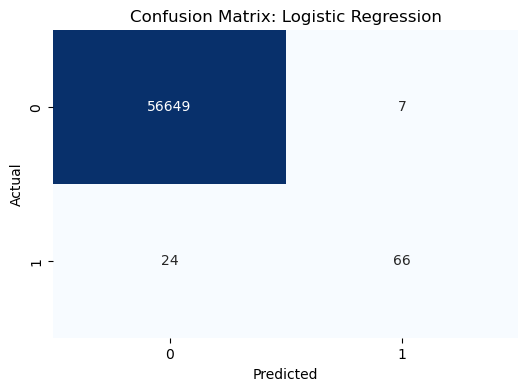

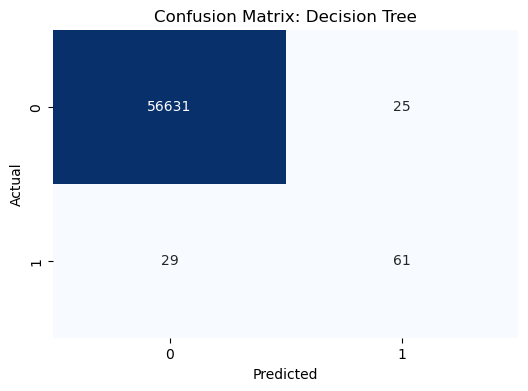

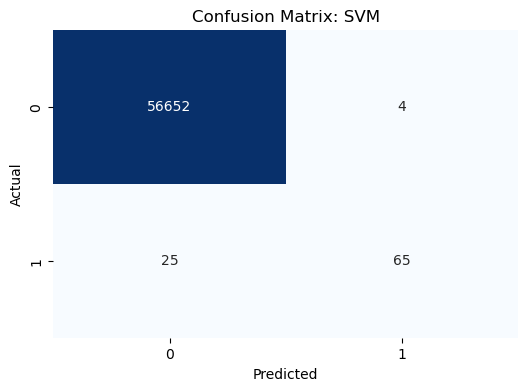

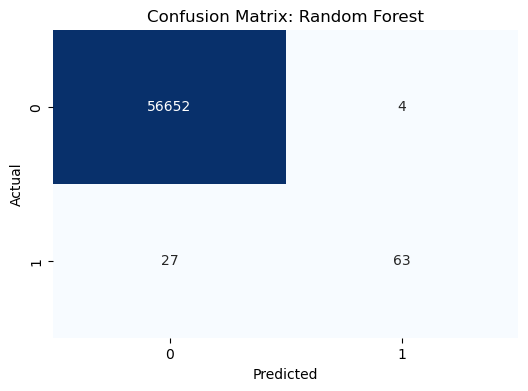

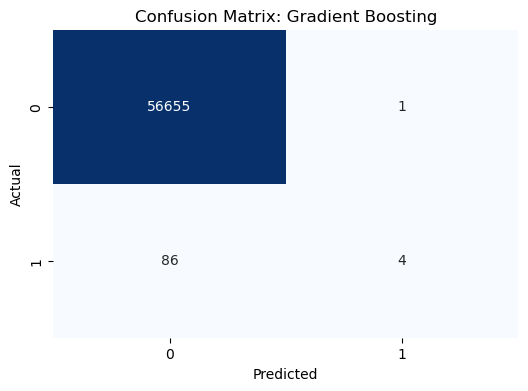

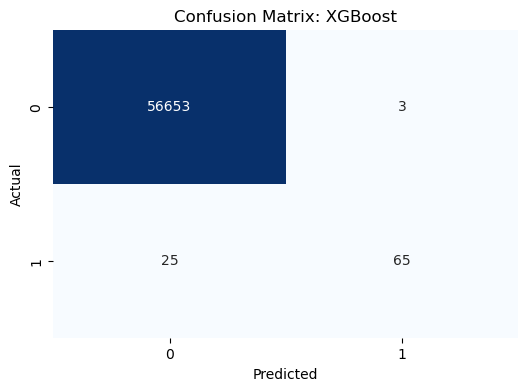

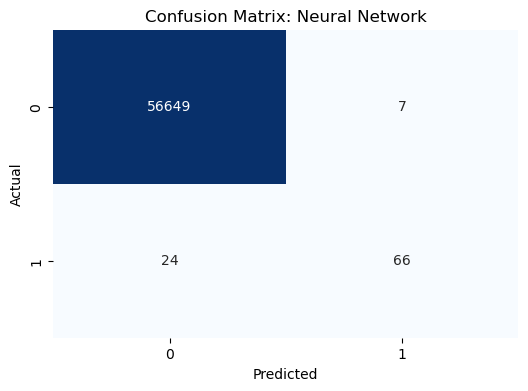

In [40]:
for model in models:
    cm = np.array(evaluation_results[model]["Confusion Matrix"])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix: {model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

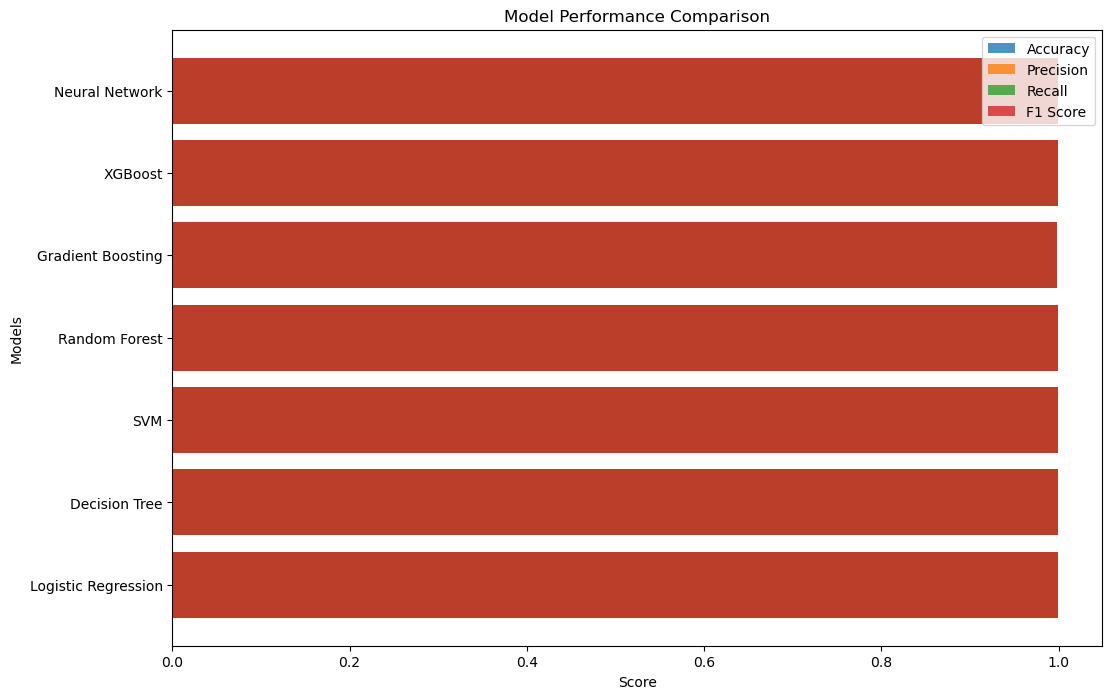

In [41]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [accuracy, precision, recall, f1_scores]
plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.barh(models, values[i], label=metric, alpha=0.8)

plt.xlabel("Score")
plt.ylabel("Models")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()

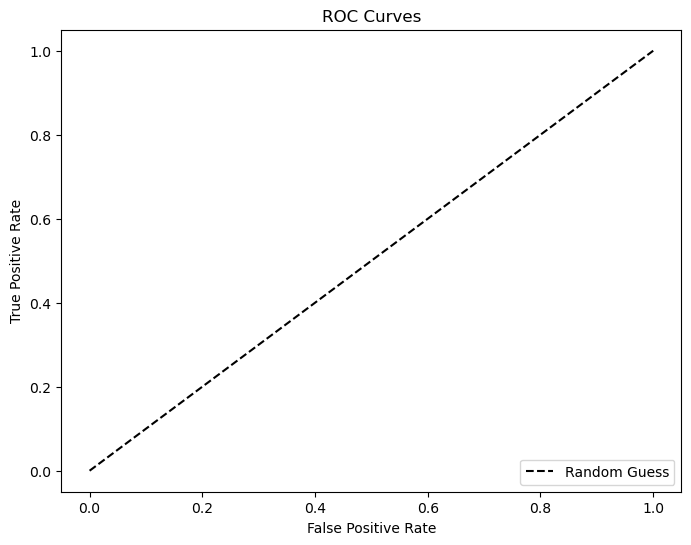

In [42]:
if any(evaluation_results[model]["ROC-AUC"] != "N/A" for model in models):
    plt.figure(figsize=(8, 6))
    for model in models:
        if evaluation_results[model]["ROC-AUC"] != "N/A":
            y_pred_proba = evaluation_results[model].get("y_pred_proba", [])
            if y_pred_proba: 
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                roc_auc = evaluation_results[model]["ROC-AUC"]
                plt.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.title("ROC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

In [26]:
def create_nn(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))  
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

nn_model = KerasClassifier(model=create_nn, input_shape=X_train_resampled.shape[1], epochs=10, batch_size=32, verbose=0)


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    'Neural Network': nn_model
}

In [27]:
evaluation_results = {}
trained_models = {}

for name, model in models.items():
    print(f"Training {name} with SMOTE-resampled data...")
    model.fit(X_train_resampled, y_train_resampled)  # Train on resampled data
    trained_models[name] = model

    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)  # Test on original test data
    if hasattr(model, "predict_proba"):  
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = None

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    # Save metrics to the dictionary
    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1 Score": report["weighted avg"]["f1-score"],
        "Classification Report": report,
        "Confusion Matrix": cm.tolist(),
        "ROC-AUC": roc_auc,
    }

Training Logistic Regression with SMOTE-resampled data...
Evaluating Logistic Regression...
Training Decision Tree with SMOTE-resampled data...
Evaluating Decision Tree...
Training SVM with SMOTE-resampled data...
Evaluating SVM...
Training Random Forest with SMOTE-resampled data...
Evaluating Random Forest...
Training Gradient Boosting with SMOTE-resampled data...
Evaluating Gradient Boosting...
Training XGBoost with SMOTE-resampled data...
Evaluating XGBoost...
Training Neural Network with SMOTE-resampled data...
Evaluating Neural Network...


In [28]:
print("\nModel Evaluation Results:\n")
for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    print("\n" + "=" * 40 + "\n")


Model Evaluation Results:

Model: Logistic Regression
Accuracy: 0.9702710323194587
Precision: 0.9983236038939868
Recall: 0.9702710323194587
F1 Score: 0.9834662441983848
Classification Report: {'0': {'precision': 0.9998363249495336, 'recall': 0.9703826602654617, 'f1-score': 0.9848893347545301, 'support': 56656.0}, '1': {'precision': 0.04604889141557703, 'recall': 0.9, 'f1-score': 0.08761492698756085, 'support': 90.0}, 'accuracy': 0.9702710323194587, 'macro avg': {'precision': 0.5229426081825553, 'recall': 0.9351913301327308, 'f1-score': 0.5362521308710455, 'support': 56746.0}, 'weighted avg': {'precision': 0.9983236038939868, 'recall': 0.9702710323194587, 'f1-score': 0.9834662441983848, 'support': 56746.0}}
Confusion Matrix: [[54978, 1678], [9, 81]]
ROC-AUC: 0.9762100316922402


Model: Decision Tree
Accuracy: 0.9976386000775385
Precision: 0.998545284018914
Recall: 0.9976386000775385
F1 Score: 0.9980072770757199
Classification Report: {'0': {'precision': 0.9995404249301799, 'recall': 0.

In [5]:
def create_nn_(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))  
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))  
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))  
    model.add(Dropout(0.5))  
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))  #
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

nn_model = KerasClassifier(build_fn=create_nn_, input_shape=X_train_resampled.shape[1], epochs=10, batch_size=32, verbose=0)

models_regularized = {
    'Logistic Regression Regularized': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.1),  
    'Decision Tree Regularized': DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5),  
    'SVM Regularized': SVC(kernel='linear', C=0.1, probability=True),  
    'Random Forest Regularized': RandomForestClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5),  
    'Gradient Boosting Regularized': GradientBoostingClassifier(max_depth=5), 
    'XGBoost Regularized': xgb.XGBClassifier(eval_metric='mlogloss', max_depth=5, min_child_weight=10),  
    'Neural Network Regularized': nn_model
}


# models_regularized = {
#     'Logistic Regression Regularized': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.1),  
#     'SVM Regularized': SVC(kernel='linear', C=0.1, probability=True),  
#     'Random Forest Regularized': RandomForestClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5),  
#     'Decision Tree Regularized': DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5),  
#     'Gradient Boosting Regularized': GradientBoostingClassifier(max_depth=5), 
#     'XGBoost Regularized': xgb.XGBClassifier(eval_metric='mlogloss', max_depth=5, min_child_weight=10),  
#     'Neural Network Regularized': nn_model
# }

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

evaluation_results_Regularization = {}
trained_models_Regularization = {}

# Perform cross-validation and compare accuracies
for name, model in models_regularized.items():
    print(f"Training and Evaluating {name} with cross-validation...")

    # Cross-validation with ElasticNet regularization
    cv_results = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
    print(f"{name} CV Accuracy: {cv_results.mean()}")

    # Train on full resampled data
    model.fit(X_train_resampled, y_train_resampled)
    trained_models_Regularization[name] = model

    # Evaluate model on test data
    print(f"Evaluating {name} on test data...")
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    # Save metrics to evaluation results
    evaluation_results_Regularization[name] = {
        "CV Accuracy": cv_results.mean(),
        "Test Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1 Score": report["weighted avg"]["f1-score"],
        "Classification Report": report,
        "Confusion Matrix": cm.tolist(),
        "ROC-AUC": roc_auc,
    }


Training and Evaluating Logistic Regression Regularized with cross-validation...


c:\Users\menna\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\menna\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\menna\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\menna\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\menna\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Regularized CV Accuracy: 0.7486227862567041


c:\Users\menna\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Evaluating Logistic Regression Regularized on test data...
Training and Evaluating Decision Tree Regularized with cross-validation...
Decision Tree Regularized CV Accuracy: 0.9697451286267779
Evaluating Decision Tree Regularized on test data...
Training and Evaluating SVM Regularized with cross-validation...


#### the above NoteBook is a previous Project about the Fraud Detection

#### Fraud Detection DEPI 

In [1]:
import pandas as pd
data = {
    "Sample": [1, 2, 3, 4, 5],
    "Actual Class": [1, 0, 1, 0, 1],
    "Model A Score": [0.8, 0.3, 0.6, 0.2, 0.7],
    "Model B Score": [0.7, 0.4, 0.8, 0.3, 0.6]
}
df = pd.DataFrame(data)
df

,Sample,Actual Class,Model A Score,Model B Score
0,1,1,0.8,0.7
1,2,0,0.3,0.4
2,3,1,0.6,0.8
3,4,0,0.2,0.3
4,5,1,0.7,0.6


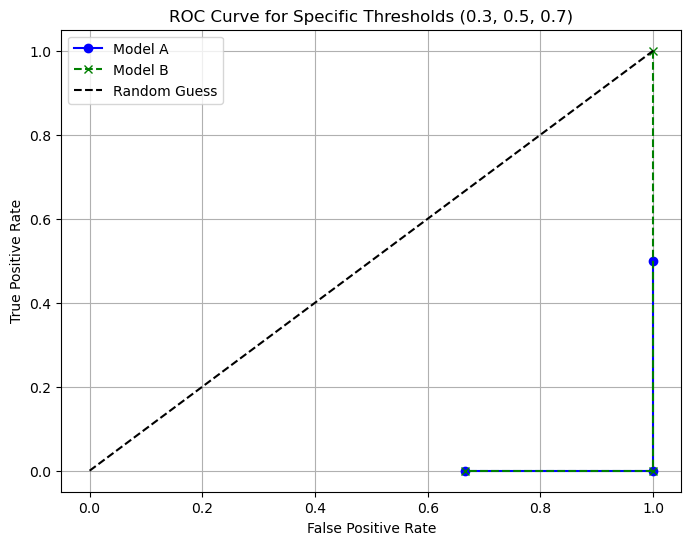

In [24]:
import matplotlib.pyplot as plt

def compute_tpr_fpr(scores, actuals, threshold):
    predictions = [1 if score >= threshold else 0 for score in scores]
    tp = sum(1 for p, a in zip(predictions, actuals) if p == 1 and a == 1)  
    fp = sum(1 for p, a in zip(predictions, actuals) if p == 1 and a == 0)  
    fn = sum(1 for p, a in zip(predictions, actuals) if p == 0 and a == 1)  
    tn = sum(1 for p, a in zip(predictions, actuals) if p == 0 and a == 0)  
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0 
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0 
    return tpr, fpr

actual_class = df['Actual Class']
model_a_scores = df['Model A Score']
model_b_scores = df['Model B Score']

thresholds = [0.3, 0.5, 0.7]

roc_points_a = [compute_tpr_fpr(model_a_scores, actual_class, t) for t in thresholds]
roc_points_b = [compute_tpr_fpr(model_b_scores, actual_class, t) for t in thresholds]

fpr_a, tpr_a = zip(*roc_points_a)
fpr_b, tpr_b = zip(*roc_points_b)

plt.figure(figsize=(8, 6))
plt.plot(fpr_a, tpr_a, label="Model A", marker='o', linestyle='-', color='blue')
plt.plot(fpr_b, tpr_b, label="Model B", marker='x', linestyle='--', color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Specific Thresholds (0.3, 0.5, 0.7)")
plt.legend()
plt.grid()
plt.show()


In [19]:
from sklearn.metrics import log_loss

actual_class = df['Actual Class']
model_a_scores = df['Model A Score']
model_b_scores = df['Model B Score']

log_loss_a = log_loss(actual_class, model_a_scores)
log_loss_b = log_loss(actual_class, model_b_scores)

print(f"Model A Log Loss: {log_loss_a:.4f}")
print(f"Model B Log Loss: {log_loss_b:.4f}")

Model A Log Loss: 0.3341
Model B Log Loss: 0.3916


#### from the previous detection we notice that the Model (A) is BETTER because it has the small Log_Loss